<h1><center>Challenge Alura - Data Science - Alura Cash </center></h1>
<h1><center>ETAPA II</center></h1>


Essa etapa do Challenge consiste no tratamento da base de dados a fim de facilitar e melhorar a ánalise dos mesmos.

### <center> Importação da base de dados </center>

Os arquivos originais foram disponibilizados em uma fonte 'dump', contendo quatro tabelas ('dados_mutuarios', 'emprestimos', 'historico_bancos', 'ids').

A tabela de 'ids' contém informações que possibilita a união com as demais tabelas. Essa união das tabelas foi realizada no MySQL e exportada no formato csv.

In [53]:
import pandas as pd

In [54]:
dados = pd.read_csv('../BRONZE/dados_aluracash.csv', sep=';')

In [55]:
dados.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,27,68000,Rent,4.0,Homeimprovement,A,8700,7.88,0,0.13,N,5
1,24,12600,Rent,2.0,Venture,C,2500,13.11,1,0.20,Y,2
2,30,100000,Rent,13.0,Debtconsolidation,A,12000,7.88,0,0.12,N,9
3,28,83000,Mortgage,6.0,Debtconsolidation,B,5000,0.00,0,0.06,N,9
4,30,110400,Rent,1.0,Venture,D,14000,16.89,1,0.13,N,6


<h2><center>Verificação de valores nulos</center></h2>

In [56]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34501 entries, 0 to 34500
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  34501 non-null  int64  
 1   person_income               34501 non-null  int64  
 2   person_home_ownership       34170 non-null  object 
 3   person_emp_length           34501 non-null  float64
 4   loan_intent                 34186 non-null  object 
 5   loan_grade                  34188 non-null  object 
 6   loan_amnt                   34501 non-null  int64  
 7   loan_int_rate               34501 non-null  float64
 8   loan_status                 34501 non-null  int64  
 9   loan_percent_income         34501 non-null  float64
 10  cb_person_default_on_file   34131 non-null  object 
 11  cb_person_cred_hist_length  34501 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [57]:
dados.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership         331
person_emp_length               0
loan_intent                   315
loan_grade                    313
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file     370
cb_person_cred_hist_length      0
dtype: int64

Como a quantidade de valores nulos é pequena em relação ao total de dados, opta-se por removê-los.

In [58]:
dados.dropna(inplace=True)

In [59]:
dados.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

<h2><center>Análise das variáveis</center></h2>

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
dados.shape

(33364, 12)

In [62]:
dados.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,33364.000000,3.336400e+04,33364.000000,33364.000000,33364.000000,33364.000000,33364.000000,33364.000000
mean,27.560964,6.564629e+04,4.628372,9530.410023,9.892094,0.216431,0.169132,5.807038
std,6.699776,6.174371e+04,4.159764,6348.498108,4.524982,0.411817,0.107199,4.057827
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.826800e+04,2.000000,5000.000000,7.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,7.900000e+04,7.000000,12000.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Observando a descrição dos dados, observa-se que há algumas informações incoerentes que devem ser melhor observadas.

### person_age

<AxesSubplot:xlabel='person_age'>

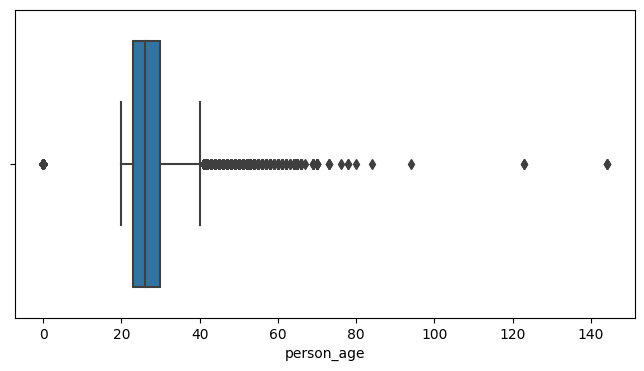

In [63]:
plt.figure(figsize=(8,4))
sns.boxplot(data=dados, x='person_age')


Pelo gráfico e por se tratar de concessão de empréstimos, idade menor que 18 anos e maior que 80 anos podem ser desconsideradas.

In [64]:
dados = dados[dados.person_age < 80]
dados = dados[dados.person_age > 18]

In [65]:
dados.shape

(33147, 12)

### person_income

<AxesSubplot:xlabel='person_income'>

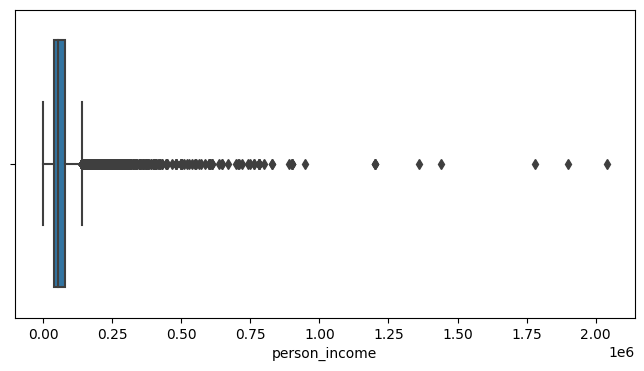

In [66]:
plt.figure(figsize=(8,4))
sns.boxplot(data=dados, x='person_income')


In [67]:
(dados.person_income > 1000000).sum()

8

Há oito usuários com salário anual maior que $1000000,00, que pelo gráfico acima indicam ser outliers. Por ser uma amostra pequena em relação ao total de dados, opta-se por retirá-los.

In [68]:
dados = dados[dados.person_income < 1000000]

In [69]:
dados.shape

(33139, 12)

### person_emp_length

<AxesSubplot:xlabel='person_emp_length'>

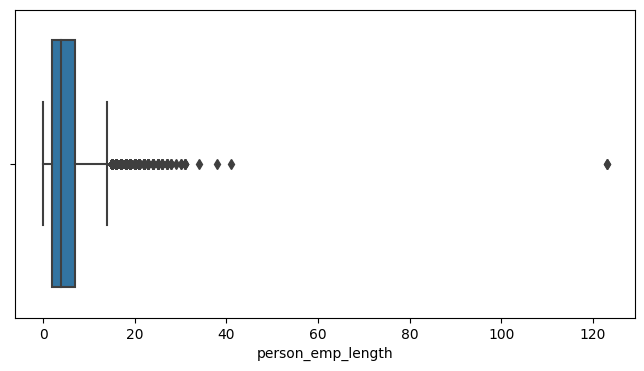

In [70]:
plt.figure(figsize=(8,4))
sns.boxplot(data=dados, x='person_emp_length')

Pelo gráfico usuários com tempo de trabalho superior a 40 anos podem ser considerados outliers. 

In [71]:
dados = dados[dados.person_emp_length < 40]
dados.shape

(33136, 12)

### loan_amnt

<AxesSubplot:xlabel='loan_amnt'>

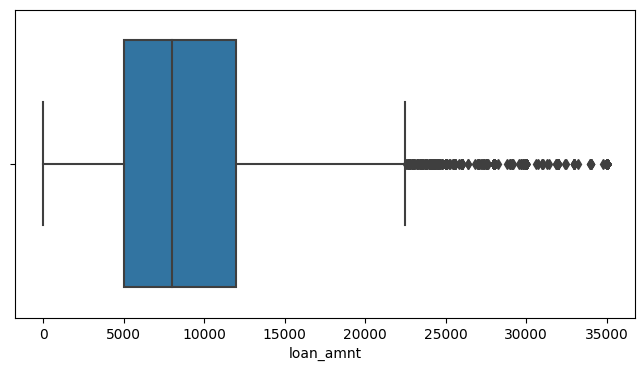

In [72]:
plt.figure(figsize=(8,4))
sns.boxplot(data=dados, x='loan_amnt')

Empréstimo com valor nulo deve ser desconsiderado.

In [73]:
dados = dados[dados.loan_amnt != 0]
dados.shape

(32966, 12)

### loan_int_rate

<AxesSubplot:xlabel='loan_int_rate'>

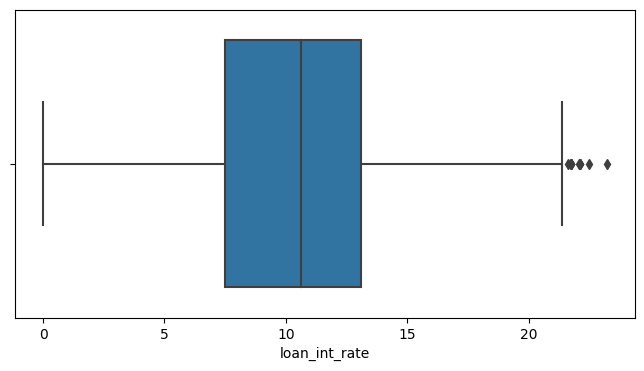

In [74]:
plt.figure(figsize=(8,4))
sns.boxplot(data=dados, x='loan_int_rate')

Empréstimos a juros 0 também devem ser desconsiderados.

In [75]:
dados = dados[dados.loan_int_rate != 0]
dados.shape

(29673, 12)

### loan_percent_income

Essa variável representa a razão entre o valor total do empréstimo e o salário anual do usuário, valores que já estão presente de forma indivudial na base de dados. Portanto podemos desconsiderar essa coluna da tabela.

In [89]:
dados.drop('loan_percent_income', axis=1, inplace=True, errors='ignore')

In [77]:
dados.shape

(29673, 11)

Após a limpeza dos dados, o dataframe passou de 34501 para 29673 linhas, uma redução de 14% em relação à base de dados original. Apesar de ser uma redução significativa, ainda há uma quantidade suficiente para análise e geração de modelos preditivos.

### cb_person_default_on_file

Conversão dos valores de 'string' para 'boolean'.

In [84]:
dicionario = {'N': 0,'Y': 1}
dados.replace(dicionario, inplace=True)

In [85]:
dados.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
0,27,68000,Rent,4.0,Homeimprovement,A,8700,7.88,0,0,5
1,24,12600,Rent,2.0,Venture,C,2500,13.11,1,1,2
2,30,100000,Rent,13.0,Debtconsolidation,A,12000,7.88,0,0,9
4,30,110400,Rent,1.0,Venture,D,14000,16.89,1,0,6
5,31,26988,Rent,0.0,Venture,A,5800,6.62,0,0,9


<h2><center> Analise de correlação das variáveis </center></h2>

In [86]:
dados.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
person_age,1.000000,0.135730,0.169661,0.055421,0.013294,-0.020546,0.010346,0.869524
person_income,0.135730,1.000000,0.181863,0.355467,0.000990,-0.180830,-0.002319,0.115960
person_emp_length,0.169661,0.181863,1.000000,0.116742,-0.044629,-0.089537,-0.025035,0.146307
loan_amnt,0.055421,0.355467,0.116742,1.000000,0.147144,0.106224,0.040244,0.045433
loan_int_rate,0.013294,0.000990,-0.044629,0.147144,1.000000,0.334218,0.501106,0.016180
loan_status,-0.020546,-0.180830,-0.089537,0.106224,0.334218,1.000000,0.179234,-0.013630
cb_person_default_on_file,0.010346,-0.002319,-0.025035,0.040244,0.501106,0.179234,1.000000,0.008878
cb_person_cred_hist_length,0.869524,0.115960,0.146307,0.045433,0.016180,-0.013630,0.008878,1.000000


<AxesSubplot:>

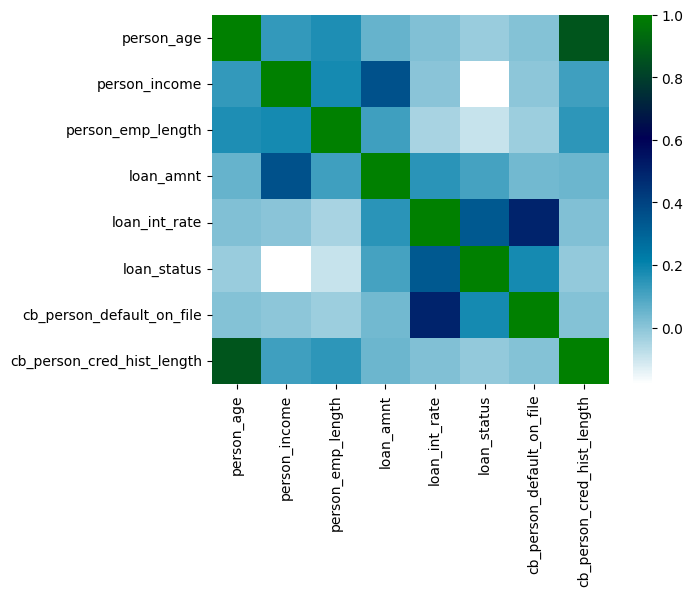

In [88]:
sns.heatmap(dados.corr(), cmap='ocean_r')

Em relação à variável alvo 'loan_status', nota-se uma maior correlação positiva com a 'loan_int_rate' (0.33), com a variável 'cb_person_default_on_file' (0.18), 'loan_amnt' (0.1) e uma correlação negativa com 'person_income' (-0.18). Logo, podemos sugerir que :
- Quanto maior a taxa de juros, maior a probabilidade de inadimplência.
- Quando o usuário já está em situação de inadimplência, a probabilidade de inadimplência é maior.
- Quanto maior o valor total do empréstimo, maior a probabilidade de inadimplência.
- Quanto menor o salário anual do usuário, maior a probabilidade de inadimplência.

<h2><center>Exportando os dados</center></h2>

In [98]:
dados.to_csv('../SILVER/dados_ml.csv')